# Neurale netwerken

## Wat?

### Biologisch
Menselijke hersenen bestaan uit zenuwcellen of neuronen.
Een neuron combineert binnenkomende signalen van andere neuronen en geeft dit signaal op zijn beurt weer door aan andere neuronen. **Versterking of verzwakking** van het signaal gebeurt in de dendrieten 

### Artificieel
<p align="center">
<img src="rsc/img/1_SJPacPhP4KDEB1AdhOFy_Q.png">
</p>

#### Activatie functie
Iedere neuron bevat een functie $g$ om zijn gewogen input $z$ te mappen op een nieuwe waarde.
Veel gebruikte functies zijn:
* lineaire functie
* sigmoid functie
* relu functie
* leaky relu functie
* tanh functie
* elu functie

Een **Atrificial Neural Network (ANN)** is een netwerk van neuronen die met elkaar verbonden zijn.
Ieder netwerk heeft bepaalde lagen:
* input layer
* hidden layers
* output layer

Iedere laag bevat een aantal neuronen. De input layer bevat evenveel neuronen als er features zijn in de dataset. De output layer bevat evenveel neuronen als er classes zijn in de dataset. De hidden layers kunnen een willekeurig aantal neuronen bevatten en kunnen met een willekeurig aantal lagen zijn.Iedere neuron in een laag is verbonden met iedere neuron in de volgende laag. Deze connectie heeft een gewicht en een bias.

<img src="rsc/img/Schermafbeelding 2024-06-07 131056.png">

Een **ANN** kan verschillende architecturen hebben:
* Feedforward Neural Network
* Recurrent Neural Network
* LSTM
* Autoencoder
* Convolutional Neural Network
* Kohonen Network
* ...
Ieder van deze architecturen heeft zijn eigen toepassingen en voordelen. Hier gaan we dieper in op het **Feedforward Neural Network** (**Feedforward NN**). 

## Feedforward Neural Network
### Voorbeeld
XOR gate:

|  A  |  B  |  A XOR B  |
|:---:|:---:|:---------:|
|  0  |  0  |     0     |
|  0  |  1  |     1     |
|  1  |  0  |     1     |
|  1  |  1  |     0     |

- 2 inputs (**covariaten**)
- 1 output (**response variabele**)
- ⇒
- 2 ingangneuronen
- 1 uitgangsneuron

Bij een **Feedforward NN** ligt het aantal hidden neuronen meestal ergens tussen het aantal input en output neuronen. In dit geval nemen we 2 hidden neuronen.
- We voegen aan de inputlaag en hidden layer een extra neuron toe die altijd een waarde van 1 heeft. Dit is de **bias**.
    - De constante neuronen kunnen geen input krijgen, maar geven altijd een ouput aan alle niet constante neuronen in de volgende laag. 

<img src="rsc/img/Schermafbeelding 2024-06-07 132102.png">

## ANN in Python

### Stap 0: Importeren van de nodige libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKeras
from keras.src.utils import plot_model

from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

### Stap 1: Laad de dataset en inspecteer de gegevens

In [2]:
xor_data = pd.DataFrame({'P1': [0, 1, 0, 1], 'P2': [0, 0, 1, 1], 'Q': [0, 1, 1, 0]})
x_xor_data = xor_data[['P1', 'P2']]
y_xor_data = xor_data[['Q']]

xor_data
x_xor_data
y_xor_data

,P1,P2,Q
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0


,P1,P2
0,0,0
1,1,0
2,0,1
3,1,1


,Q
0,0
1,1
2,1
3,0


### Stap 2: Voer de nodige data management manipulaties uit om de data verwerkingsklaar te maken

### Stap 3: Normaliseer de data (alleen indien nodig en indien normalisatie geen deel uit maakt van het gekozen ANN model)

### Stap 4: Indien vereist, splits de dataset op in een training- en test dataset

### Stap 5: Bouw het model

In [3]:
inputs_xor = Input(shape=(2,))
x_xor = Dense(2, activation='sigmoid')(inputs_xor)  #sigmoid(x) = 1 / (1 + exp(-x))
outputs_xor = Dense(1, activation='sigmoid')(x_xor)
model_xor = Model(inputs_xor, outputs_xor, name='XOR_NN')

model_xor.compile(optimizer=Adam(learning_rate=0.00001),
                  loss=keras.losses.binary_crossentropy,
                  metrics=['accuracy'])

#### Parameters
##### Dense
- activation: 
    - *sigmoid*: Past de **sigmoid** activatie functie toe: $sigmoid(x) = 1/1(1+exp(-x))$. Geeft een waarde tussen 0 en 1 terug, niet zinvol in een regressie ANN
    - *relu*: **Past de rectified linear unit** activation functie toe: $max(x, 0)$
    - *linear*: **Lineaire** activatie functie (pass-through). Bruikbaar in een regression ANN
    - *softmax*: Converteer een vector met waarden in een kansverdeling. Bruikbaar wanneer de output laag bestaat uit nodes voor verschillende uitkomstcategorieën

##### *model*.compile
- optimizer:
    - *Adam(learning_rate=LR)*
        - LR ∈ {0.1,0.01,0.001,0.0001,0.00001,0.000001}
    - *RMSprop(learning_rate=LR)* Zinvol in een regressie ANN
- loss:
    - *keras.losses.binary_crossentropy* wanneer de ANN een binaire classificatie beoogd
    - *keras.losses.categorical_crossentropy* wanneer de ANN een multiclass classificatie beoogd
    - *keras.losses.MeanAbsoluteError()* wanneer de verwachte uitkomst een numerieke waarde is
- metrics:
    - *['accuracy']* Zinvol in een classificatie ANN
    - *keras.metrics.MeanAbsolutePercentageError()* Zinvol in een regressie ANN

### Stap 6: Train het model

In [4]:
history_xor = model_xor.fit(x_xor_data, y_xor_data, epochs=200, callbacks=[PlotLossesKeras()], verbose=False)

accuracy
	accuracy         	 (min:    0.500, max:    0.500, cur:    0.500)
Loss
	loss             	 (min:    0.709, max:    0.709, cur:    0.709)


#### Paramters
##### *model*.fit()
- epoch=*n*: Het aantal keren dat de trainingsvoorbeelden worden aangeboden aan de ANN

### Stap 6.2: Visualiseer het ANN model

In [5]:
model_xor.summary()

Model: "XOR_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

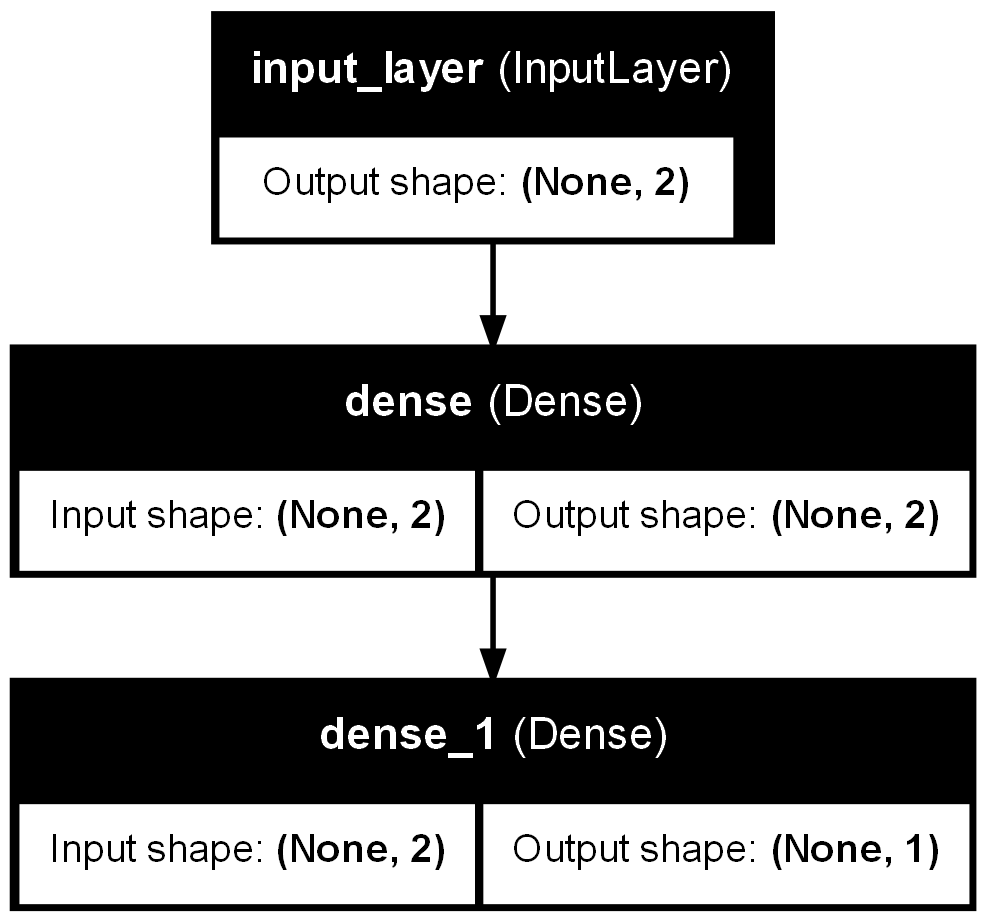

In [6]:
plot_model(model_xor, to_file='model_xor_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
#Visualisatie van de waarden van het getrainde ANN-model
for lay in model_xor.layers:
    print(lay.name)
    print(lay.get_weights())

input_layer
[]
dense
[array([[-0.6927779 , -0.56567   ],
       [ 0.9232048 , -0.61370325]], dtype=float32), array([ 0.00199779, -0.00199285], dtype=float32)]
dense_1
[array([[-0.42862484],
       [ 1.398088  ]], dtype=float32), array([-0.00199402], dtype=float32)]


### Stap 7: Evalueer de kwaliteit van het ANN-Model

In [8]:
model_xor.predict(x_xor_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


array([[0.6181792 ],
       [0.58921003],
       [0.5452415 ],
       [0.52178115]], dtype=float32)

In [9]:
model_xor.evaluate(x_xor_data, y_xor_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.5000 - loss: 0.7090


[0.7089974880218506, 0.5]

### Voorbeeld MNIST

In [10]:
#Stap 1 & 4
import keras.src.datasets

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [11]:
#stap 2
# 60,000 training images met 28x28 pixels en hun geassocieerd nummer
x_train.shape
y_train.shape

(60000, 28, 28)

(60000,)

In [12]:
#transformeer de 2D-images in 1D-vectoren
x_train = x_train.reshape((-1, 784))  # 28 x 28 = 784
x_test = x_test.reshape((-1, 784))

x_train.shape

(60000, 784)

In [13]:
#Target waarden getransformeerd in One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
inputs = Input(shape=(784,))
x = BatchNormalization()(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

In [15]:
#Construct the model
model = Model(inputs, outputs, name='MNIST_Crusher')
model.summary()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Model: "MNIST_Crusher"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,186 (227.29 KB)

 Trainable params: 56,618 (221.16 KB)

 Non-trainable params: 1,568 (6.12 KB)

In [16]:
 #Stap 6: Train het ANN-model
history = model.fit(
    x_train,  # training data
    y_train,  # training targets
    epochs=5,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8525 - loss: 0.4845 - val_accuracy: 0.9570 - val_loss: 0.2336
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9584 - loss: 0.1344 - val_accuracy: 0.9588 - val_loss: 0.3946
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9677 - loss: 0.1032 - val_accuracy: 0.9636 - val_loss: 0.3827
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9739 - loss: 0.0843 - val_accuracy: 0.9594 - val_loss: 0.4863
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9751 - loss: 0.0750 - val_accuracy: 0.9622 - val_loss: 0.4309


In [17]:
# Stap 7: evalueer
model.evaluate(x_test, y_test)

np.argmax(model.predict(x_test[:5]), axis=1)

np.argmax(y_test[:5], axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9637 - loss: 0.2653


[0.26297134160995483, 0.9642999768257141]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([7, 2, 1, 0, 4], dtype=int64)

array([7, 2, 1, 0, 4], dtype=int64)